In [1]:
import pandas as pd

df=pd.read_csv('D:/Tyler_Data/Other Skills/Datascience/MMDT_GitHub/MMDT_2025_MLAI101/Htet-Aung-Phyo/KNN_Classifier/fraud.csv', index_col = 0)


In [2]:
# inspecting dataframe
print(df.head())
print(df.info())

   Unnamed: 0        V1        V2        V3        V4        V5        V6  \
0           0  1.176563  0.323798  0.536927  1.047002 -0.368652 -0.728586   
1           1  0.681109 -3.934776 -3.801827 -1.147468 -0.735540 -0.501097   
2           2  1.140729  0.453484  0.247010  2.383132  0.343287  0.432804   
3           3 -1.107073 -3.298902 -0.184092 -1.795744  2.137564 -1.684992   
4           4 -0.314818  0.866839 -0.124577 -0.627638  2.651762  3.428128   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.084678 -0.069246 -0.266389  ... -0.109627 -0.341365  0.057845  0.499180   
1  1.038865 -0.626979 -2.274423  ...  0.652202  0.272684 -0.982151  0.165900   
2  0.093380  0.173310 -0.808999  ... -0.003802  0.058556 -0.121177 -0.304215   
3 -2.015606 -0.007181 -0.165760  ...  0.130648  0.329445  0.927656 -0.049560   
4  0.194637  0.670674 -0.442658  ... -0.312774 -0.799494 -0.064488  0.953062   

        V25       V26       V27       V28  Amount  Class

In [3]:
# Check your data and define X and y : What is X and what is y? 

# assigning y 
y = df['Class'].values

# removing index column
df = df.iloc[:,1:]

# assigning X values
X = df.drop(columns = 'Class').values

#counting class
df[['Class']].value_counts()

Class
0        21337
1          356
Name: count, dtype: int64

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [5]:
# checking X and y shape
print(X.shape)
print(y.shape)

(21693, 29)
(21693,)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, precision_score, recall_score, f1_score
)

In [7]:
# Split data 40% testing, 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
# different K values
k_values = range(1, 21)
accuracies = []
models = {}
precisions = []
recalls = []
f1_scores = []
auc_scores = []

for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_prob)

    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    auc_scores.append(auc)
    accuracies.append(acc)
    models[k] = pipeline

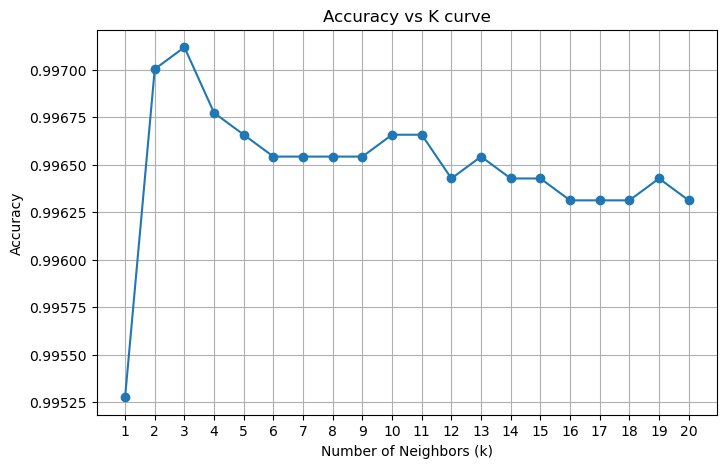

In [9]:
# Plot Accuracy vs k curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs K curve')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

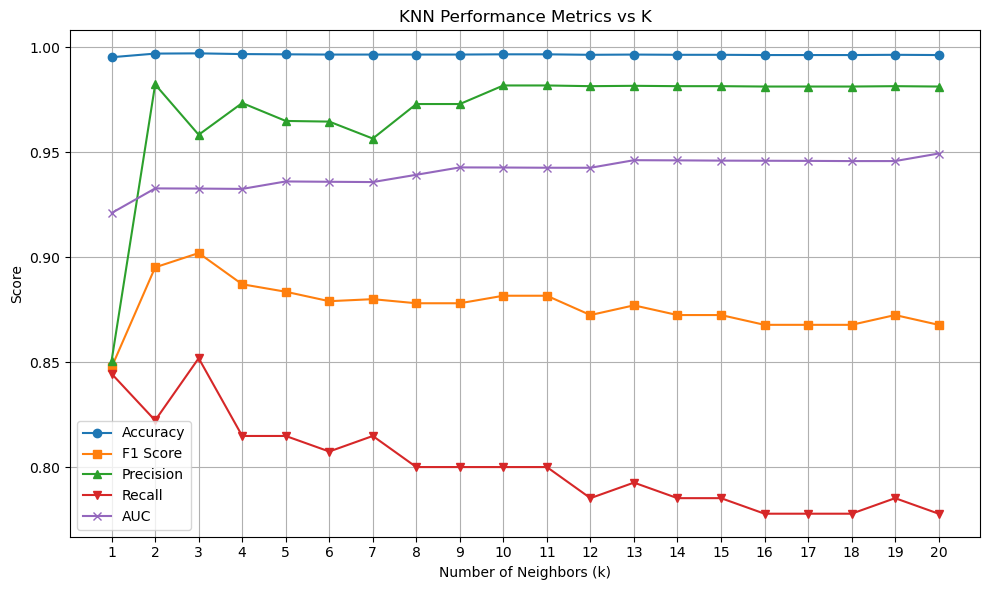

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, f1_scores, marker='s', label='F1 Score')
plt.plot(k_values, precisions, marker='^', label='Precision')
plt.plot(k_values, recalls, marker='v', label='Recall')
plt.plot(k_values, auc_scores, marker='x', label='AUC')

plt.title('KNN Performance Metrics vs K')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
# Choose best K (highest accuracy)
best_k = k_values[np.argmax(accuracies)]
best_model = models[best_k]

print(f"\n🔍 Best k: {best_k} with accuracy = {max(accuracies):.3f}")


🔍 Best k: 3 with accuracy = 0.997


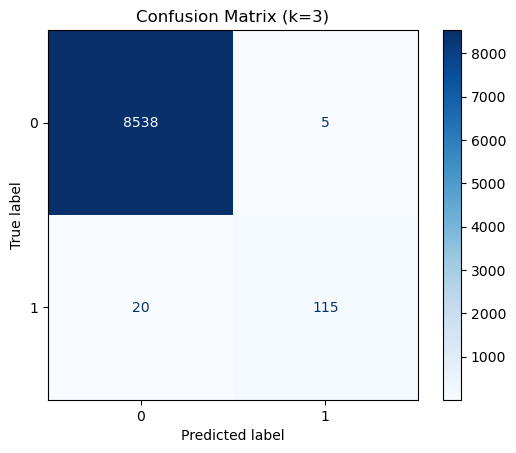

In [12]:
# Evaluation on test set using best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (k={best_k})')
plt.show()

In [13]:
# 5.2 Classification Report
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))


🧾 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8543
           1       0.96      0.85      0.90       135

    accuracy                           1.00      8678
   macro avg       0.98      0.93      0.95      8678
weighted avg       1.00      1.00      1.00      8678



In [14]:
auc = roc_auc_score(y_test, y_prob)
print(auc)

0.9326873637069119


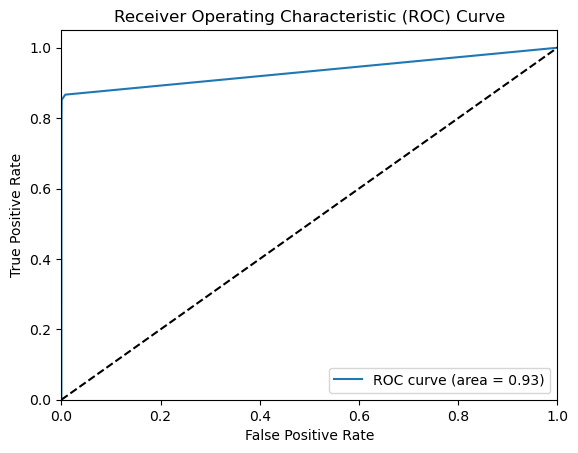

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [16]:
ypred_train = best_model.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = best_model.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[12790     4]
 [   40   181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12794
           1       0.98      0.82      0.89       221

    accuracy                           1.00     13015
   macro avg       0.99      0.91      0.94     13015
weighted avg       1.00      1.00      1.00     13015

0.9995020290195418


In [17]:
df_threshold = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df_threshold

,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000117,0.785185,1.000000
2,0.000585,0.851852,0.666667
3,0.007726,0.866667,0.333333
4,1.000000,1.000000,0.000000


# 70 % data split

In [18]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#different K values
k_values = range(1, 21)
accuracies_7 = []
models_7 = {}

for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_7.append(acc)
    models_7[k] = pipeline

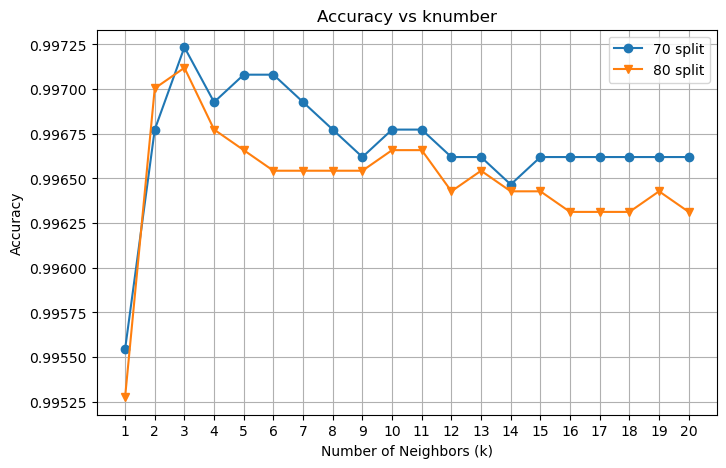

In [19]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies_7, marker='o',label= '70 split')
plt.plot(k_values, accuracies, marker='v', label = '80 split')
plt.title('Accuracy vs knumber')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [20]:
# Choose best K (highest accuracy)
best_k = k_values[np.argmax(accuracies)]
best_model_7 = models_7[best_k]

print(f"\n🔍 Best k: {best_k} with accuracy = {max(accuracies):.3f}")


🔍 Best k: 3 with accuracy = 0.997


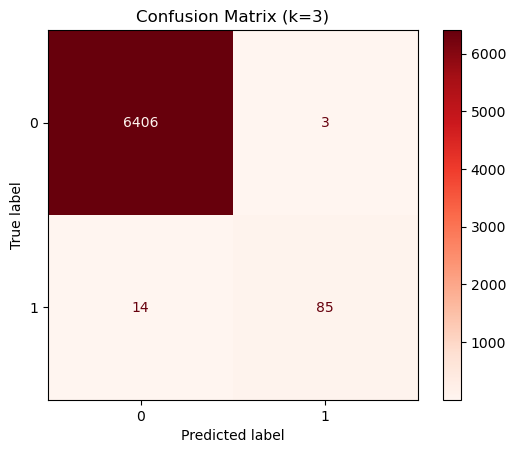

In [21]:

#Evaluation on test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title(f'Confusion Matrix (k={best_k})')
plt.show()


In [22]:
#Classification Report
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))


🧾 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6409
           1       0.97      0.86      0.91        99

    accuracy                           1.00      6508
   macro avg       0.98      0.93      0.95      6508
weighted avg       1.00      1.00      1.00      6508



0.9286822035300736


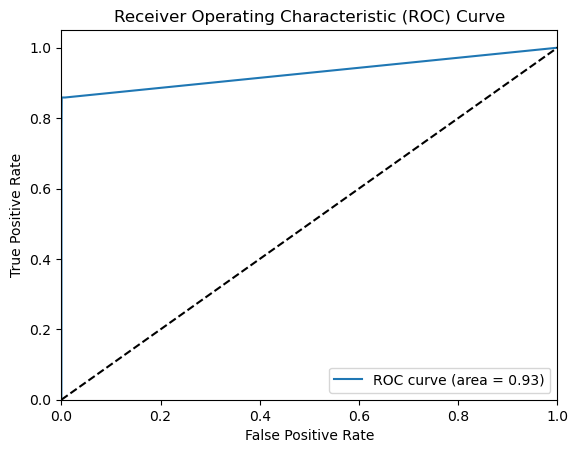

[[14923     5]
 [   41   216]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14928
           1       0.98      0.84      0.90       257

    accuracy                           1.00     15185
   macro avg       0.99      0.92      0.95     15185
weighted avg       1.00      1.00      1.00     15185

0.9916697423899309


,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000156,0.777778,1.000000
2,0.000624,0.858586,0.666667
3,0.007333,0.858586,0.333333
4,1.000000,1.000000,0.000000


In [23]:
ypred_testP = best_model_7.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)

fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ypred_train = best_model_7.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = best_model.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

df_threshold = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df_threshold